In [1]:
# Importamos las librerías 
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

In [2]:
#Call the database

wd = "C:/Users/avalo/OneDrive/Documentos/tec_documentos_plataforma/facebook_work/facebook_mock.csv"

df = pd.read_csv(wd)
df.head()

,Page.total.likes,Type,Category,Post.Month,Post.Weekday,Post.Hour,Paid,LPost.Tot.Reach,LPost.Tot.Impressions,Lifetime.Engaged.Users,LPost.Consumers,LPost.Consumptions,LPost.Liked.Page.Impressions,LPost.Liked.Page.Reach,LPeople.Post.Like...Engange,comment,like,share,Total.Interactions,Clus_km
0,139441,Photo,2,12,4,3,0,2752,5091,178,109,159,3078,1640,119,4,79,17,100,0
1,139441,Status,2,12,3,10,0,10460,19057,1457,1361,1674,11710,6112,1108,5,130,29,164,0
2,139441,Photo,3,12,3,3,0,2413,4373,177,113,154,2812,1503,132,0,66,14,80,0
3,139441,Photo,2,12,2,10,1,50128,87991,2211,790,1119,61027,32048,1386,58,1572,147,1777,1
4,139441,Photo,2,12,2,3,0,7244,13594,671,410,580,6228,3200,396,19,325,49,393,1


In [3]:
#Name of columns
list(df.columns) 

['Page.total.likes',
 'Type',
 'Category',
 'Post.Month',
 'Post.Weekday',
 'Post.Hour',
 'Paid',
 'LPost.Tot.Reach',
 'LPost.Tot.Impressions',
 'Lifetime.Engaged.Users',
 'LPost.Consumers',
 'LPost.Consumptions',
 'LPost.Liked.Page.Impressions',
 'LPost.Liked.Page.Reach',
 'LPeople.Post.Like...Engange',
 'comment',
 'like',
 'share',
 'Total.Interactions',
 'Clus_km']

In [7]:
#Quitamos la columna con el objetivo.
X = df[['Page.total.likes','Type','Category', 'Post.Month', 'Post.Weekday', 'Post.Hour', 'Paid',
        'LPost.Tot.Reach']].values
X[0:5]

array([[139441, 'Photo', 2, 12, 4, 3, 0, 2752],
       [139441, 'Status', 2, 12, 3, 10, 0, 10460],
       [139441, 'Photo', 3, 12, 3, 3, 0, 2413],
       [139441, 'Photo', 2, 12, 2, 10, 1, 50128],
       [139441, 'Photo', 2, 12, 2, 3, 0, 7244]], dtype=object)

In [8]:
#Reescribamos la columna Type pues tupo character
from sklearn import preprocessing
le_type = preprocessing.LabelEncoder()
le_type.fit(['Photo','Status', 'Link','Video'])
X[:,1] = le_type.transform(X[:,1]) 

In [9]:
X[0:5]

array([[139441, 1, 2, 12, 4, 3, 0, 2752],
       [139441, 2, 2, 12, 3, 10, 0, 10460],
       [139441, 1, 3, 12, 3, 3, 0, 2413],
       [139441, 1, 2, 12, 2, 10, 1, 50128],
       [139441, 1, 2, 12, 2, 3, 0, 7244]], dtype=object)

In [10]:
#Ahora extraemos la variable objetivo
y = df["Clus_km"]
y[0:5]

0    0
1    0
2    0
3    1
4    1
Name: Clus_km, dtype: int64

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

In [13]:
X_trainset.shape

(501, 8)

In [14]:
y_trainset.shape

(501,)

In [15]:
X_testset.shape

(215, 8)

In [16]:
y_testset.shape

(215,)

In [17]:
fbTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
fbTree # muestra los parámetros dados por default 

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [18]:
fbTree.fit(X_trainset,y_trainset)


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [19]:
predTree = fbTree.predict(X_testset)

In [20]:
print (predTree [0:5])
print (y_testset [0:5])

[1 1 0 1 0]
606    1
491    1
81     1
539    1
270    0
Name: Clus_km, dtype: int64


In [21]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.8372093023255814


In [22]:
#!conda install -c conda-forge pydotplus -y
#!conda install -c conda-forge python-graphviz -y

In [23]:
#Llamamos a las librerías
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

C:\anaconda\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


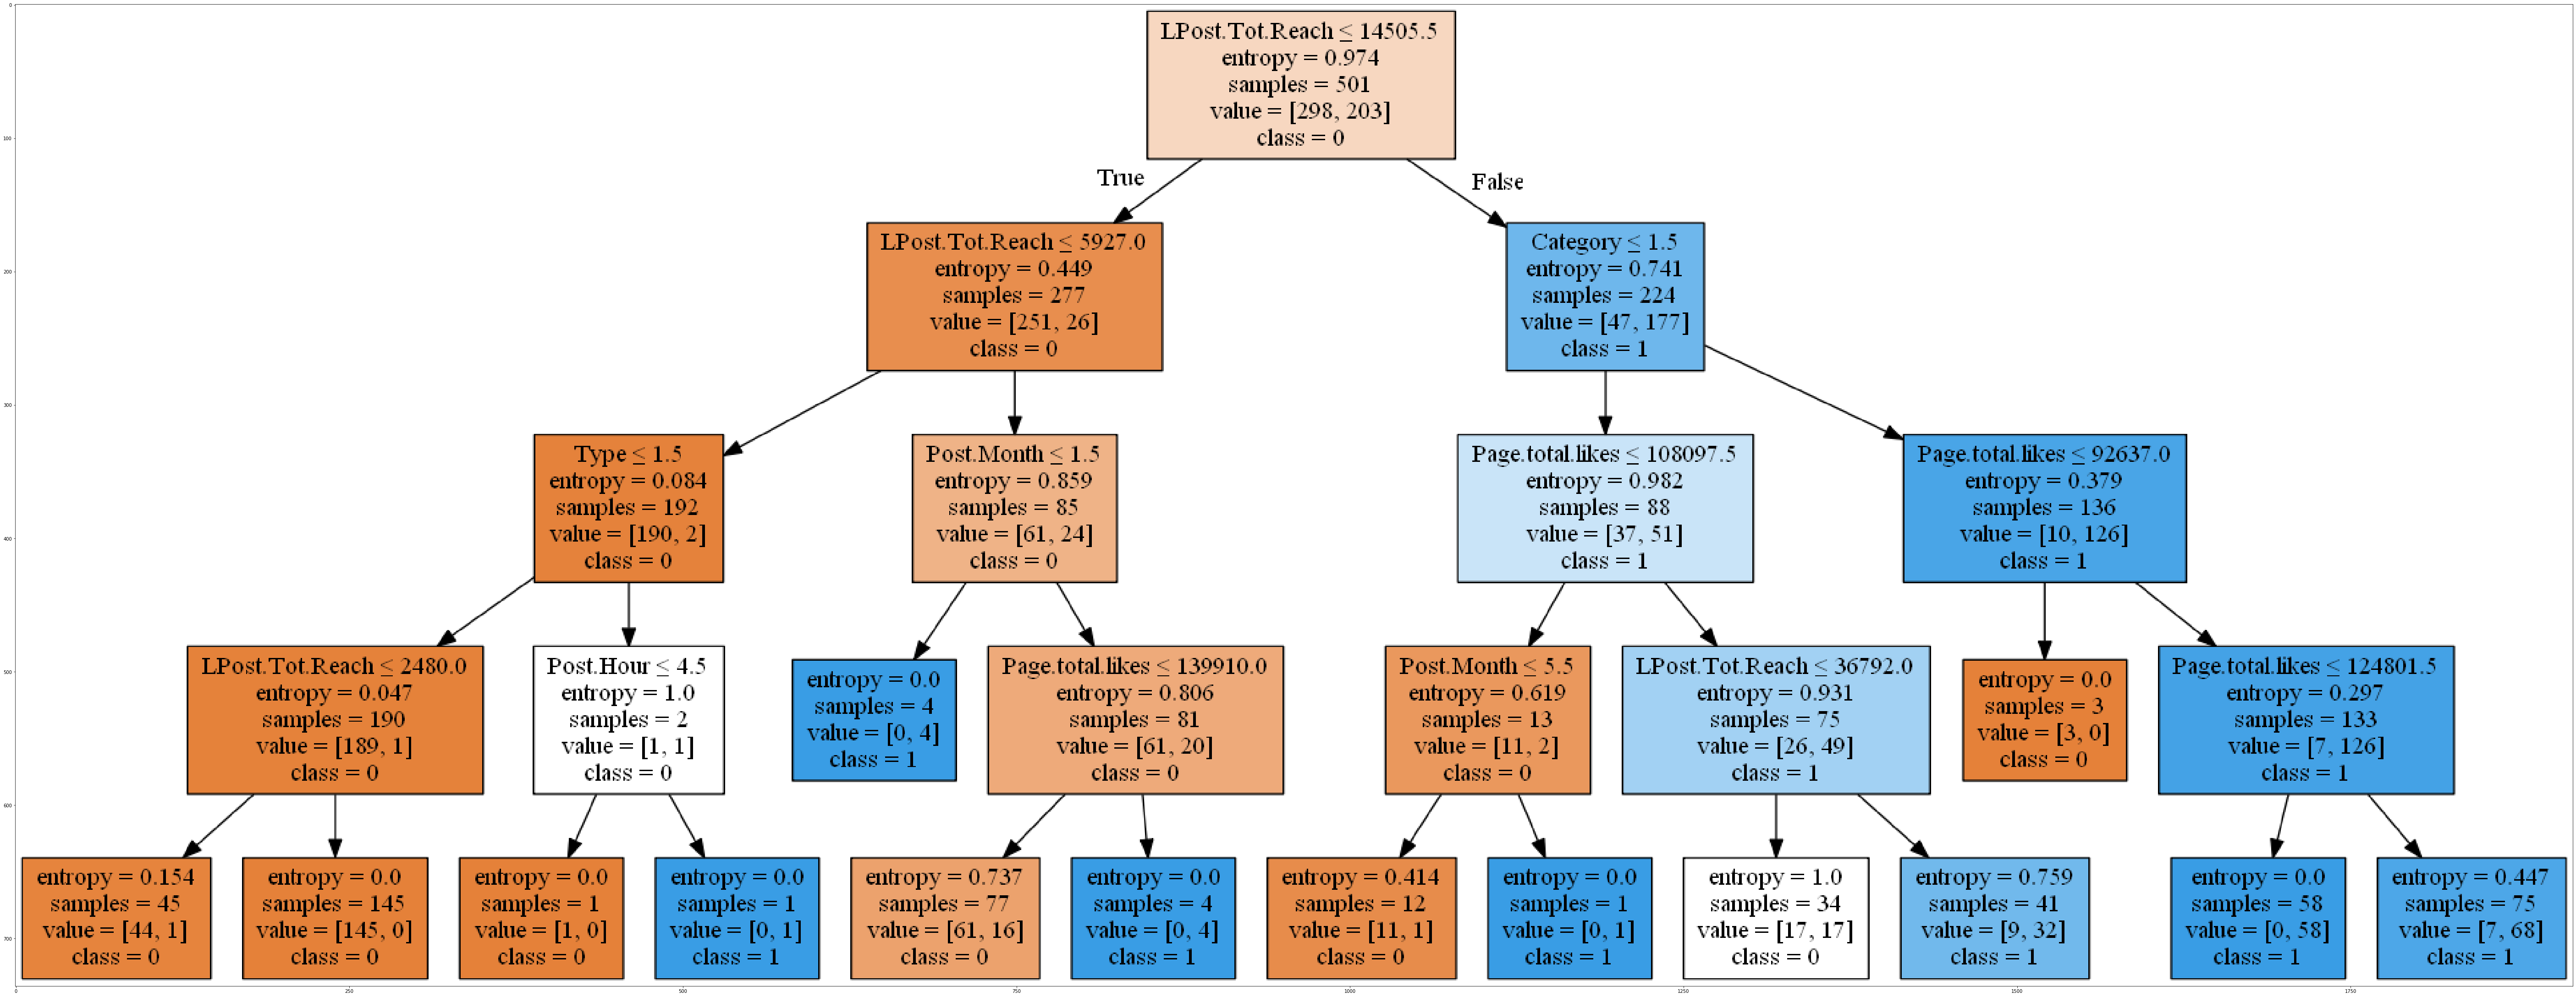

In [25]:
dot_data = StringIO()# Para leer y escribir cadenas (Strings)
filename = "fbtree.png"
featureNames = df.columns[0:8]
targetNames = df["Clus_km"].unique().tolist()
out=tree.export_graphviz(fbTree,feature_names=featureNames, out_file=dot_data, class_names= ["0","1"], filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')